# Neural Nets Intro

In [136]:
import numpy as np
from numpy.random import randn, seed
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

## The need for neural networks
**Why nnets?**

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [86]:
n = 100
x = np.linspace(0, 3, n).reshape(-1, 1)
noise = randn(n, 1)
p1 = np.poly1d([3, 1])
p2 = np.poly1d([-0.8, 0.1, 1])

### Linear Regression
Underlying model: $y = 3x + 1$

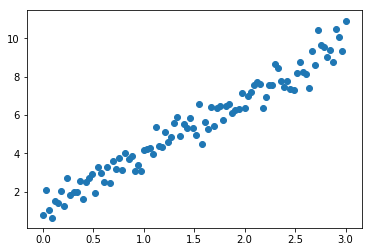

In [91]:
y = p1(x) + 0.5 * noise
plt.scatter(x, y)
plt.show()

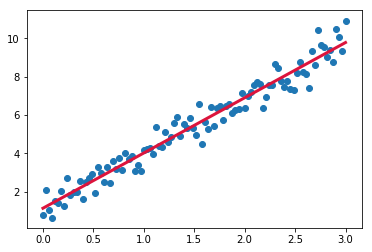

In [92]:
linm1 = LinearRegression()
linm1.fit(x, y)

plt.scatter(x, y)
plt.plot(x, linm1.predict(x), c="crimson", linewidth=3)
plt.show()

### Linear Regression 2
Underlying model: $y = -0.8x^2 + x + 1$

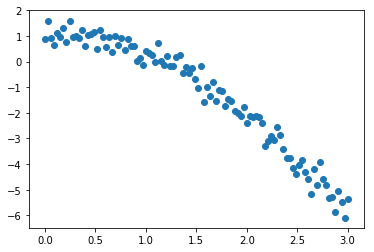

In [97]:
y = p2(x) + 0.3* noise
plt.scatter(x, y)
plt.show()

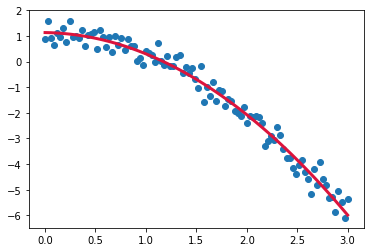

In [118]:
linm2 = LinearRegression()
p = PolynomialFeatures(degree=2)
x2 = p.fit_transform(x)
linm2.fit(x2, y)

plt.scatter(x, y)
plt.plot(x, linm2.predict(x2), c="crimson", linewidth=3)
plt.show()

## Classification Problem

In [119]:
from pydataset import data

In [132]:
iris = data("iris")
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [133]:
iris["area_sepal"] = iris["Sepal.Length"] * iris["Sepal.Width"]
iris["area_petal"] = iris["Petal.Length"] * iris["Petal.Width"]

In [138]:
train, test  = train_test_split(iris[["Species", "area_sepal", "area_petal"]], test_size=0.2)

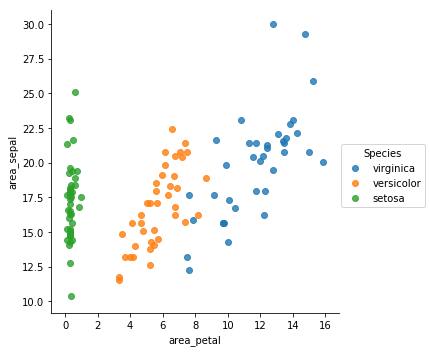

In [162]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species", data=train, fit_reg=False)
plt.show()

In [170]:
train_x, train_y = train.drop("Species", axis=1).values, train["Species"].values

In [172]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [178]:
lreg = LogisticRegression()
lreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [180]:
prediction = lreg.predict(test.drop("Species", axis=1).values)
test_y = test.Species

In [182]:
test["Species_pred"] = prediction

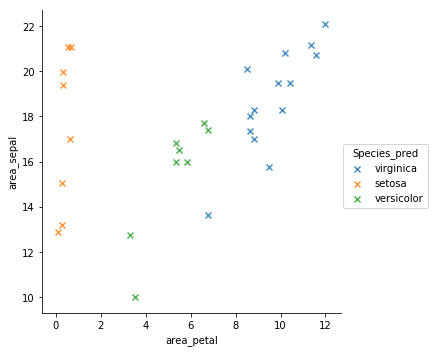

In [192]:
sns.lmplot(x="area_petal", y="area_sepal", hue="Species_pred", fit_reg=False, data=test, markers="x")
plt.show()

In [191]:
test.query("Species_pred != Species")

,Species,area_sepal,area_petal,Species_pred
78,versicolor,20.10,8.50,virginica
69,versicolor,13.64,6.75,virginica
